In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import random
import torch
torch.cuda.get_device_name(0)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


'Tesla T4'

# Show input images/labels

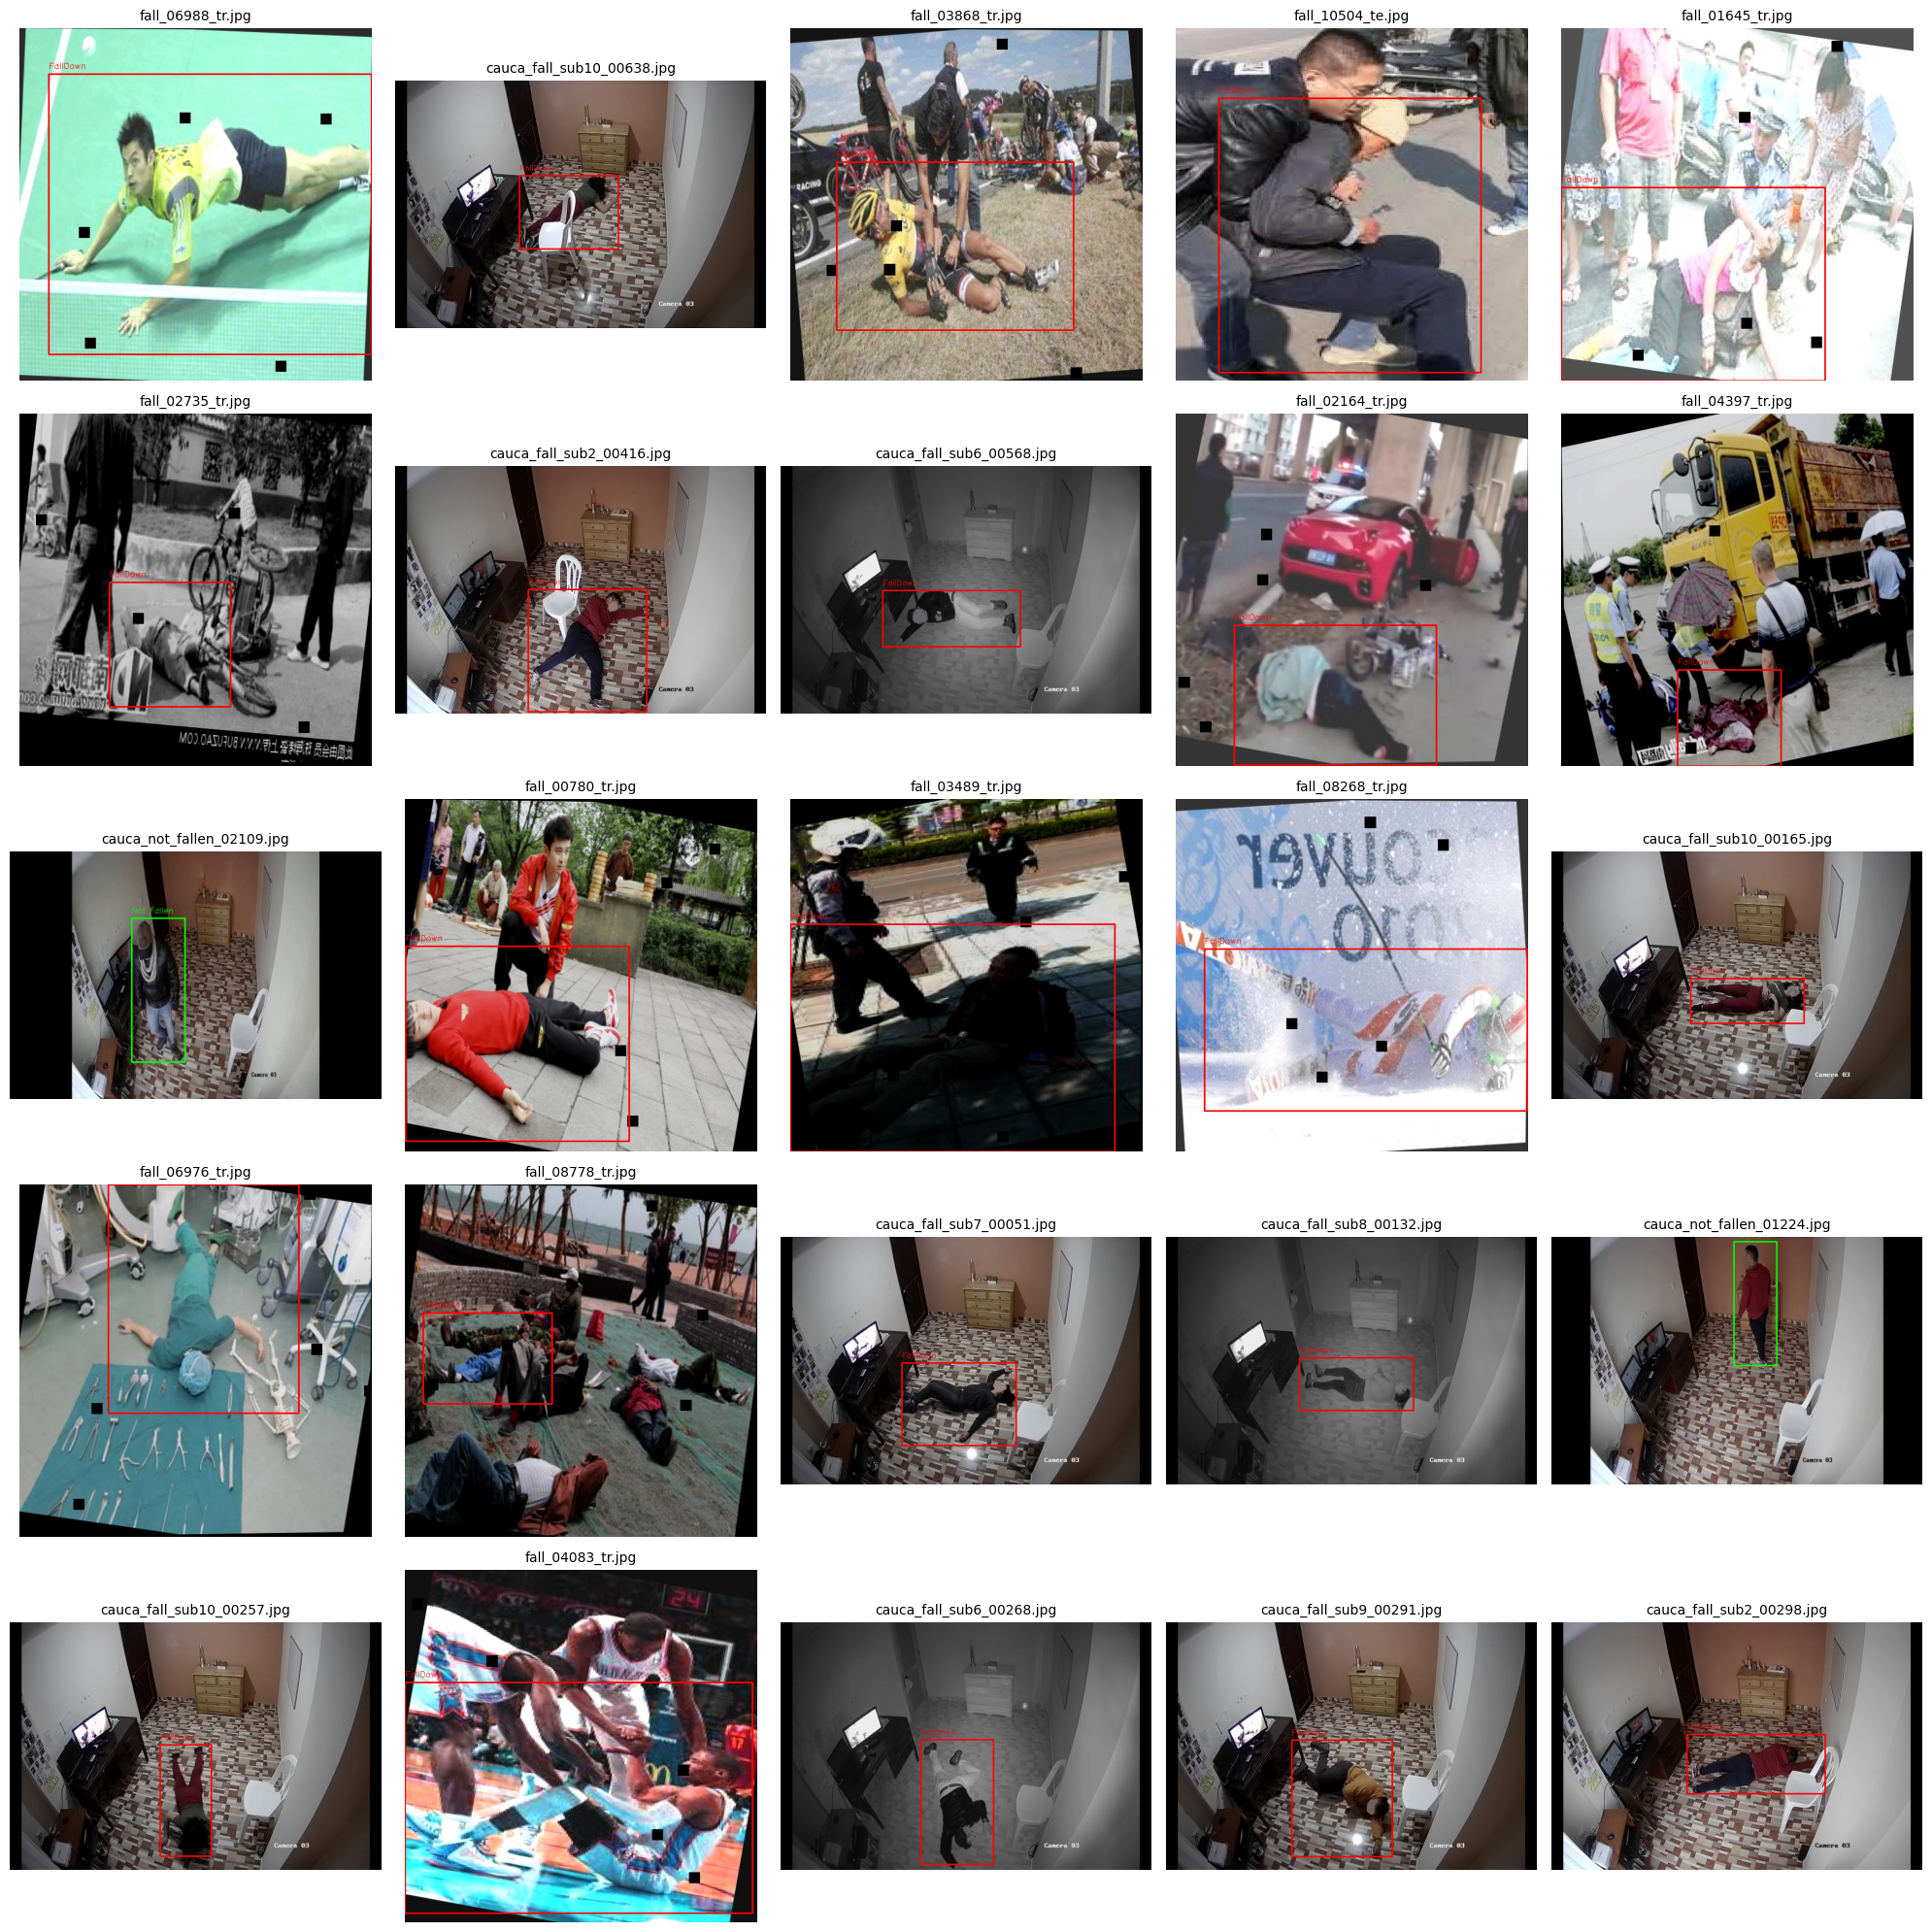

In [3]:
# Đường dẫn thư mục ảnh và label
image_dir = "/kaggle/input/dataset-fall-detection/train/images"
label_dir = "/kaggle/input/dataset-fall-detection/train/labels"

# Hàm vẽ bounding box
def draw_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                class_id, x_center, y_center, w, h = map(float, parts)
                x1 = int((x_center - w / 2) * width)
                y1 = int((y_center - h / 2) * height)
                x2 = int((x_center + w / 2) * width)
                y2 = int((y_center + h / 2) * height)

                color = (255, 0, 0) if class_id == 0 else (0, 255, 0)  # đỏ hoặc xanh
                label = "FallDown" if class_id == 0 else "Not Fallen"
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                cv2.putText(img, label, (x1, max(y1 - 10, 0)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return img

# Lấy ngẫu nhiên 25 ảnh từ thư mục
image_files = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png"))]
random.shuffle(image_files)
sample_files = image_files[:25]

# Hiển thị 5x5 ảnh
plt.figure(figsize=(20, 20))
for i, image_file in enumerate(sample_files):
    img_path = os.path.join(image_dir, image_file)
    label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + ".txt")

    img_with_boxes = draw_boxes(img_path, label_path)

    plt.subplot(5, 5, i + 1)
    plt.imshow(img_with_boxes)
    plt.title(image_file, fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Training

In [4]:
# Load mô hình YOLOv9
model = YOLO("yolov9m.pt")

100%|██████████| 39.1M/39.1M [00:00<00:00, 166MB/s]


In [5]:
# Huấn luyện mô hình với dữ liệu fall detection
model.train(
    data="/kaggle/input/customyaml/my_custom.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    optimizer="SGD",  # có thể thay bằng 'Adam' hoặc 'NAdam'
    dropout=0.3,
    lr0=0.001,
    device=0  
)

Ultralytics 8.3.115 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9m.pt, data=/kaggle/input/customyaml/my_custom.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 16.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1    171648  ultralytics.nn.modules.block.RepNCSPELAN4    [64, 128, 128, 64, 1]         
  3                  -1  1    276960  ultralytics.nn.modules.block.AConv           [128, 240]                    
  4                  -1  1    629520  ultralytics.nn.modules.block.RepNCSPELAN4    [240, 240, 240, 120, 1]       
  5                  -1  1    778320  ultralytics.nn.modules.block.AConv           [240, 360]                    
  6                  -1  1   1414080  ultralytics.nn.modules.block.RepNCSPELAN4    [360, 360, 360, 180, 1]       
  7                  -1  1   1556160  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.1 ms, read: 7.9±5.1 MB/s, size: 57.6 KB)


train: Scanning /kaggle/input/dataset-fall-detection/train/labels... 14362 images, 4 backgrounds, 0 corrupt: 100%|██████████| 14362/14362 [01:22<00:00, 173.37it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/dataset-fall-detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 11.5±3.7 MB/s, size: 67.9 KB)


val: Scanning /kaggle/input/dataset-fall-detection/val/labels... 4787 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4787/4787 [00:25<00:00, 190.37it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/dataset-fall-detection/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 149 weight(decay=0.0), 156 weight(decay=0.0005), 155 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.63G      1.156      1.448      1.519         27        640: 100%|██████████| 898/898 [10:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:12<00:00,  2.07it/s]

                   all       4787       4796      0.918      0.895      0.946      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.68G     0.9763     0.7868       1.35         26        640: 100%|██████████| 898/898 [10:14<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796       0.93       0.93      0.963      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.67G     0.9417     0.7237      1.328         18        640: 100%|██████████| 898/898 [10:09<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796      0.934      0.927      0.967      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.67G     0.9301     0.7068       1.31         20        640: 100%|██████████| 898/898 [10:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:10<00:00,  2.14it/s]

                   all       4787       4796      0.947      0.936       0.97      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.74G     0.8946     0.6819      1.291         21        640: 100%|██████████| 898/898 [10:07<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:10<00:00,  2.14it/s]

                   all       4787       4796      0.941      0.944      0.973        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.67G     0.8786     0.6356      1.274         18        640: 100%|██████████| 898/898 [10:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:10<00:00,  2.14it/s]

                   all       4787       4796      0.953       0.95      0.979      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.72G     0.8557     0.6105      1.254         22        640: 100%|██████████| 898/898 [10:07<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.958       0.95       0.98      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.67G     0.8424     0.6039      1.255         23        640: 100%|██████████| 898/898 [10:07<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796      0.947      0.952       0.98      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.71G      0.822     0.5746       1.23         27        640: 100%|██████████| 898/898 [10:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.957      0.958      0.983       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.68G      0.807     0.5565      1.213         26        640: 100%|██████████| 898/898 [10:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.961      0.959      0.984      0.835


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.72G     0.7048     0.3858      1.171         10        640: 100%|██████████| 898/898 [10:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:10<00:00,  2.14it/s]

                   all       4787       4796      0.958      0.958      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.67G     0.6923       0.36      1.157         10        640: 100%|██████████| 898/898 [10:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:10<00:00,  2.14it/s]

                   all       4787       4796      0.964       0.96      0.985      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.72G     0.6685     0.3462      1.135         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.968      0.968      0.987      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.67G     0.6523     0.3305      1.108         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.969      0.969      0.987      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.72G     0.6367     0.3129      1.084         10        640: 100%|██████████| 898/898 [10:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796      0.969      0.968      0.988      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.67G     0.6228     0.3005      1.083         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796       0.97      0.967      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.71G     0.6077     0.2913       1.07         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.972       0.97      0.989      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.67G     0.5944     0.2742      1.054         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796      0.972      0.971      0.989      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.71G     0.5835     0.2686      1.045         10        640: 100%|██████████| 898/898 [10:05<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.15it/s]

                   all       4787       4796      0.974      0.972      0.989      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.67G     0.5707     0.2588      1.036         10        640: 100%|██████████| 898/898 [10:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:09<00:00,  2.14it/s]

                   all       4787       4796      0.974      0.975       0.99      0.867



20 epochs completed in 3.774 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.115 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 151 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 150/150 [01:08<00:00,  2.19it/s]


                   all       4787       4796      0.974      0.975       0.99      0.867
              FallDown       3507       3507      0.953      0.957      0.985      0.824
            Not_Fallen       1283       1289      0.995      0.993      0.995       0.91


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 10.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb7a74f8e20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [6]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.115 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 151 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 135.3±77.0 MB/s, size: 67.2 KB)


val: Scanning /kaggle/input/dataset-fall-detection/val/labels... 4787 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4787/4787 [00:07<00:00, 681.03it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/dataset-fall-detection/val is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 300/300 [02:04<00:00,  2.41it/s]


                   all       4787       4796      0.974      0.975       0.99      0.867
              FallDown       3507       3507      0.953      0.957      0.985      0.824
            Not_Fallen       1283       1289      0.995      0.993      0.995       0.91


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 22.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb78cc287f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,   

# Testing

In [7]:
# Load model từ checkpoint đã lưu
model = YOLO("/kaggle/input/yolov9_bestmodel/pytorch/default/1/best.pt")

In [8]:
# Đánh giá trên tập test
metrics_test = model.val(split='test')

# In kết quả
print("Test Metrics:")
print(metrics_test)

Ultralytics 8.3.115 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9m summary (fused): 151 layers, 20,014,438 parameters, 0 gradients, 76.5 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 12.6±3.2 MB/s, size: 60.3 KB)


val: Scanning /kaggle/input/dataset-fall-detection/test/labels... 4788 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4788/4788 [00:20<00:00, 231.61it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/dataset-fall-detection/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 300/300 [02:04<00:00,  2.41it/s]


                   all       4788       4807      0.973      0.972      0.989       0.86
              FallDown       3488       3490      0.952       0.95      0.984      0.818
            Not_Fallen       1303       1317      0.994      0.994      0.994      0.902


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 22.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val
Test Metrics:
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb78cc3dba0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0